In [1]:
import os

%pwd

'/home/tanmay/Desktop/textSummarizer/EDA'

In [2]:
os.chdir("../")
%pwd

'/home/tanmay/Desktop/textSummarizer'

In [15]:
from datasets import load_from_disk
import numpy as np

dataset = load_from_disk("artifacts/data_ingestion/Dataset")

In [24]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14731
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [4]:
df_train = dataset["train"].to_pandas()
df_test= dataset["test"].to_pandas()
df_validation= dataset["validation"].to_pandas()

In [5]:
df_train.head()

,id,dialogue,summary
0,13818513,Amanda: I baked cookies. Do you want some?\r\...,Amanda baked cookies and will bring Jerry some...
1,13728867,Olivia: Who are you voting for in this electio...,Olivia and Olivier are voting for liberals in ...
2,13681000,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...",Kim may try the pomodoro technique recommended...
3,13730747,"Edward: Rachel, I think I'm in ove with Bella....",Edward thinks he is in love with Bella. Rachel...
4,13728094,Sam: hey overheard rick say something\r\nSam:...,"Sam is confused, because he overheard Rick com..."


In [10]:
print("Training data info: \n")
df_train.info()
print("\nTesting data info: \n")
df_test.info()
print("\nValidation data info: \n")
df_validation.info()

Training data info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14732 entries, 0 to 14731
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        14732 non-null  object
 1   dialogue  14732 non-null  object
 2   summary   14732 non-null  object
dtypes: object(3)
memory usage: 345.4+ KB

Testing data info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        819 non-null    object
 1   dialogue  819 non-null    object
 2   summary   819 non-null    object
dtypes: object(3)
memory usage: 19.3+ KB

Validation data info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        818 non-null    object
 1   dialogue  818 non-null    object


In [14]:
print("Null value count :")
df_train.isnull().sum()
df_test.isnull().sum()
df_validation.isnull().sum()

Null value count :


id          0
dialogue    0
summary     0
dtype: int64

In [20]:
train_dialogue_lengths = [len(dialogue.split()) for dialogue in dataset['train']['dialogue']]
train_summary_lengths = [len(summary.split()) for summary in dataset['train']['summary']]
print(f"Train Dialogue length stats: Mean={np.mean(train_dialogue_lengths)}, Max={np.max(train_dialogue_lengths)}, Min={np.min(train_dialogue_lengths)}")
print(f"Train Summary length stats: Mean={np.mean(train_summary_lengths)}, Max={np.max(train_summary_lengths)}, Min={np.min(train_summary_lengths)}\n")

test_dialogue_lengths = [len(dialogue.split()) for dialogue in dataset['test']['dialogue']]
test_summary_lengths = [len(summary.split()) for summary in dataset['test']['summary']]
print(f"Test Dialogue length stats: Mean={np.mean(test_dialogue_lengths)}, Max={np.max(test_dialogue_lengths)}, Min={np.min(test_dialogue_lengths)}")
print(f"Test Summary length stats: Mean={np.mean(test_summary_lengths)}, Max={np.max(test_summary_lengths)}, Min={np.min(test_summary_lengths)}\n")

validation_dialogue_lengths = [len(dialogue.split()) for dialogue in dataset['validation']['dialogue']]
validation_summary_lengths = [len(summary.split()) for summary in dataset['validation']['summary']]
print(f"Validation Dialogue length stats: Mean={np.mean(validation_dialogue_lengths)}, Max={np.max(validation_dialogue_lengths)}, Min={np.min(validation_dialogue_lengths)}")
print(f"Validation Summary length stats: Mean={np.mean(validation_summary_lengths)}, Max={np.max(validation_summary_lengths)}, Min={np.min(validation_summary_lengths)}\n")

Train Dialogue length stats: Mean=93.7863833831116, Max=803, Min=0
Train Summary length stats: Mean=20.3174721694271, Max=64, Min=1

Test Dialogue length stats: Mean=95.5079365079365, Max=516, Min=9
Test Summary length stats: Mean=20.017094017094017, Max=58, Min=3

Validation Dialogue length stats: Mean=91.64180929095355, Max=540, Min=10
Validation Summary length stats: Mean=20.283618581907092, Max=59, Min=3



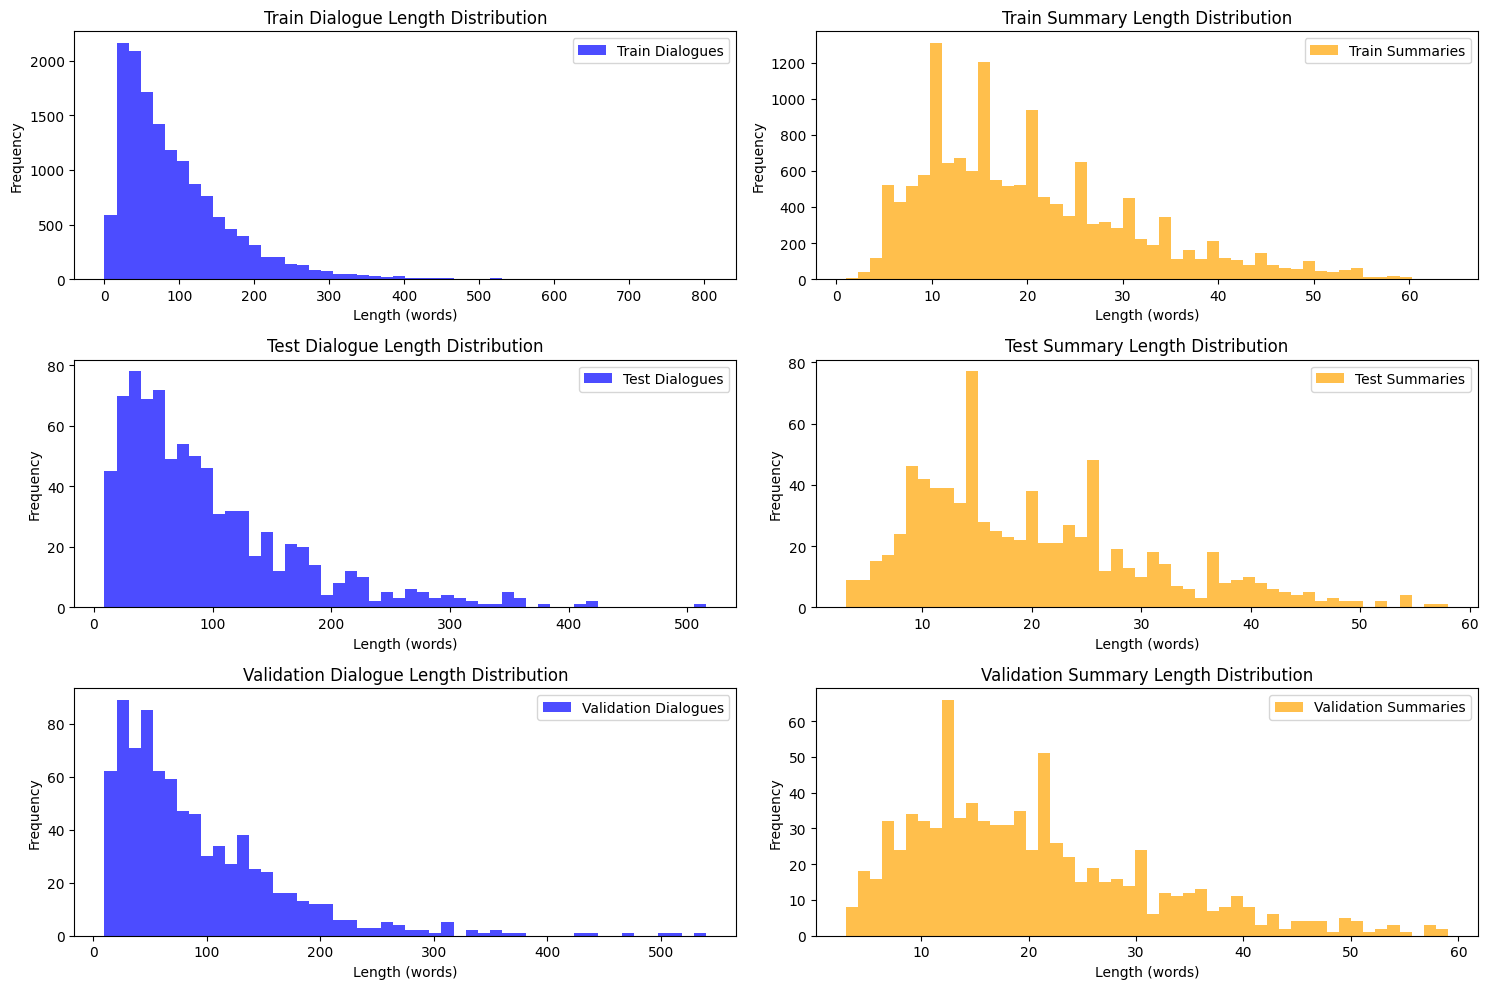

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Train set
plt.subplot(3, 2, 1)
plt.hist(train_dialogue_lengths, bins=50, alpha=0.7, color='blue', label='Train Dialogues')
plt.title("Train Dialogue Length Distribution")
plt.xlabel("Length (words)")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(3, 2, 2)
plt.hist(train_summary_lengths, bins=50, alpha=0.7, color='orange', label='Train Summaries')
plt.title("Train Summary Length Distribution")
plt.xlabel("Length (words)")
plt.ylabel("Frequency")
plt.legend()

# Test set
plt.subplot(3, 2, 3)
plt.hist(test_dialogue_lengths, bins=50, alpha=0.7, color='blue', label='Test Dialogues')
plt.title("Test Dialogue Length Distribution")
plt.xlabel("Length (words)")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(3, 2, 4)
plt.hist(test_summary_lengths, bins=50, alpha=0.7, color='orange', label='Test Summaries')
plt.title("Test Summary Length Distribution")
plt.xlabel("Length (words)")
plt.ylabel("Frequency")
plt.legend()

# Validation set
plt.subplot(3, 2, 5)
plt.hist(validation_dialogue_lengths, bins=50, alpha=0.7, color='blue', label='Validation Dialogues')
plt.title("Validation Dialogue Length Distribution")
plt.xlabel("Length (words)")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(3, 2, 6)
plt.hist(validation_summary_lengths, bins=50, alpha=0.7, color='orange', label='Validation Summaries')
plt.title("Validation Summary Length Distribution")
plt.xlabel("Length (words)")
plt.ylabel("Frequency")
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


In [22]:
def check_missing_anomalies(dataset, split_name):
    dialogues = dataset[split_name]['dialogue']
    summaries = dataset[split_name]['summary']
    
    # Check for missing (empty) values
    missing_dialogues = sum(dialogue.strip() == "" for dialogue in dialogues)
    missing_summaries = sum(summary.strip() == "" for summary in summaries)
    
    # Check for None or NaN values
    none_dialogues = sum(dialogue is None for dialogue in dialogues)
    none_summaries = sum(summary is None for summary in summaries)
    
    print(f"--- {split_name.upper()} SPLIT ---")
    print(f"Missing Dialogues: {missing_dialogues}")
    print(f"Missing Summaries: {missing_summaries}")
    print(f"None Dialogues: {none_dialogues}")
    print(f"None Summaries: {none_summaries}")
    print(f"Total Samples: {len(dialogues)}")
    print()

check_missing_anomalies(dataset, 'train')
check_missing_anomalies(dataset, 'test')
check_missing_anomalies(dataset, 'validation')

--- TRAIN SPLIT ---
Missing Dialogues: 1
Missing Summaries: 0
None Dialogues: 0
None Summaries: 0
Total Samples: 14732

--- TEST SPLIT ---
Missing Dialogues: 0
Missing Summaries: 0
None Dialogues: 0
None Summaries: 0
Total Samples: 819

--- VALIDATION SPLIT ---
Missing Dialogues: 0
Missing Summaries: 0
None Dialogues: 0
None Summaries: 0
Total Samples: 818



In [23]:
dataset['train'] = dataset['train'].filter(lambda example: example['dialogue'].strip() != "")
check_missing_anomalies(dataset, 'train')

Filter: 100%|██████████| 14732/14732 [00:00<00:00, 184301.77 examples/s]

--- TRAIN SPLIT ---
Missing Dialogues: 0
Missing Summaries: 0
None Dialogues: 0
None Summaries: 0
Total Samples: 14731

